### Load the Stroke Prediction Data

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data file
# Sources of data: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
stroke = pd.read_csv('../Dataset/healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Wrangling
We see that there is missing value in the bmi column. Let's check if there are more columns with missing values.

In [3]:
# Summary of the data
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Looks like the bmi column is the only column having missing values.  Let's see how much data is missing.

In [4]:
missing_count = stroke['bmi'].isnull().sum()
missing_percent = stroke['bmi'].isnull().mean() * 100
print('There are %d missing values. It is about %.2f%% of the BMI data which is acceptable.' % (missing_count, missing_percent))

There are 201 missing values. It is about 3.93% of the BMI data which is acceptable.


#### Handle missing data

Let's take a look at the distribution of the BMI data against age and group by gender.

<AxesSubplot:xlabel='age', ylabel='bmi'>

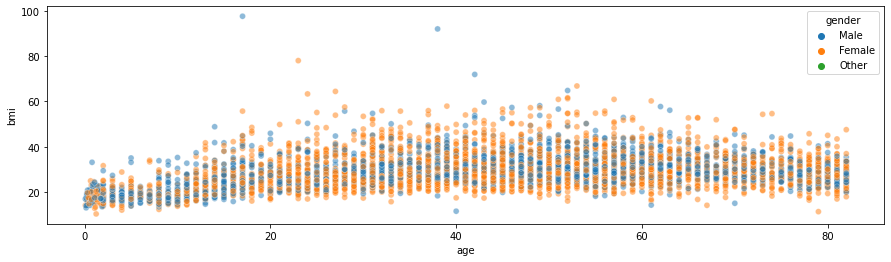

In [5]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x='age', y='bmi', data=stroke, hue='gender', alpha=0.5, ax=ax)

In [6]:
stroke['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

We see there are some outliners between the age range of about 17 to 43.  Since the median will not be affected by the outliners, we choose to fill the missing values with the median.

In [7]:
stroke['bmi'].fillna(stroke['bmi'].median(), inplace=True)

In [8]:
# Check the dataset again
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Dropping irrelevant column
The identification numbers of the patients are irrelevant to our analysis. We will drop this column.

In [9]:
stroke.drop('id', axis='columns', inplace=True)
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Clean up the dataset

In [10]:
# Check the gender column
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
# Since there is only 1 entry of 'Other' in the gender column, we'll drop the 'Other'
stroke.drop(stroke.index[(stroke['gender'] == 'Other')],axis=0,inplace=True)
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


### Exploratory Data Analysis

*stroke* is our target parameter.  Let's take a look at the relationships between the target parameter and the categorical parameters.

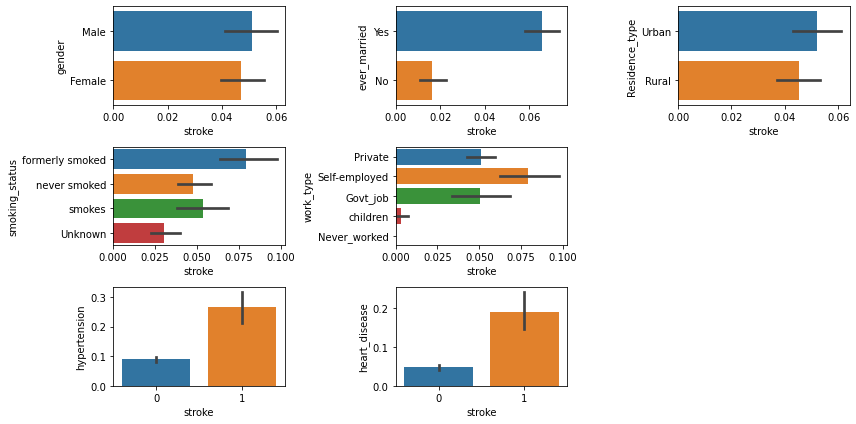

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(12, 6))
fig.delaxes(axes[1,2])
fig.delaxes(axes[2,2])

sns.barplot(x='stroke', y='gender', data=stroke, ax=axes[0,0])
sns.barplot(x='stroke', y='ever_married', data=stroke, ax=axes[0,1])
sns.barplot(x='stroke', y='Residence_type', data=stroke, ax=axes[0,2])
sns.barplot(x='stroke', y='smoking_status', data=stroke, ax=axes[1,0])
sns.barplot(x='stroke', y='work_type', data=stroke, ax=axes[1,1])
sns.barplot(x='stroke', y='hypertension', data=stroke, ax=axes[2,0])
sns.barplot(x='stroke', y='heart_disease', data=stroke, ax=axes[2,1])

plt.tight_layout()
plt.show()

From the above plots, male and female seem to have about the same chance getting a stroke.  On the other hand, if a patient has hypertension or heart disease may increase the risk of having a stroke.  We can also further analyze whether the smoking status, work type and if the patient ever married will contribute to the risk of having a stroke.

Now, let's take a look at the three numerical parameters.

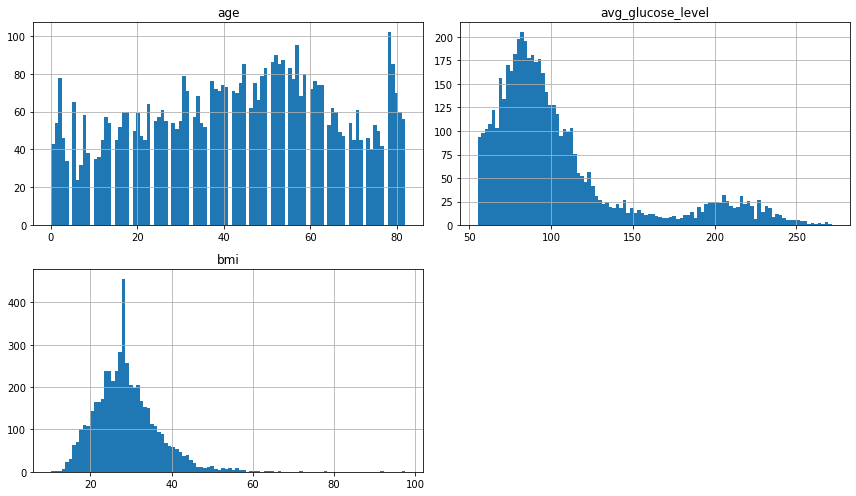

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
fig.delaxes(axes[1,1])

stroke.hist(column='age', bins=100, ax=axes[0,0])
stroke.hist(column='avg_glucose_level', bins=100, ax=axes[0,1])
stroke.hist(column='bmi', bins=100, ax=axes[1,0])

plt.tight_layout()
plt.show()

Before we build the predictive models, let's take a look at our target variable.

In [14]:
stroke.stroke.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

C:\Users\c_lin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

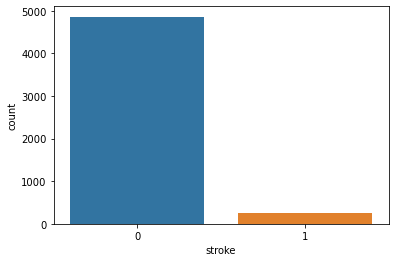

In [15]:
sns.countplot(stroke.stroke)

We can see that our majority class (0) and minority class (1) are imbalanced.  We will take this into account when we build our models.

### Prepare train and test datasets

In [16]:
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

In [17]:
# Prepare the train and test datasets
X = stroke.drop('stroke', axis='columns')
y = stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create categorical encoder for the categorial variables
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoder = ce.OneHotEncoder(cols=cat_cols, handle_unknown='return_nan', return_df=True, use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)

# Create scaler for the numerical variables
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[['age', 'avg_glucose_level', 'bmi']]))
X_train_scaled.columns = ['age', 'avg_glucose_level', 'bmi']

# Combine the encoded and scaled variables
X_train_processed = pd.concat([X_train_encoded.drop(['age', 'avg_glucose_level', 'bmi'], axis=1).reset_index(drop=True), X_train_scaled], axis=1)

# Encode the categorical variables and scale the numerical variables of the test dataset
X_test_encoded = encoder.transform(X_test)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[['age', 'avg_glucose_level', 'bmi']]))
X_test_processed = pd.concat([X_test_encoded.drop(['age', 'avg_glucose_level', 'bmi'], axis=1).reset_index(drop=True), X_test_scaled], axis=1)

C:\Users\c_lin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


### Building predictive models

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, f1_score
from scipy.stats import loguniform

#### First model: Logistic Regression

In [19]:
model_LR = LogisticRegression()
model_LR.fit(X_train_processed, y_train)
predict_LR = model_LR.predict(X_test_processed)

In [20]:
# Let's take a look at the model's accuracy
print("Train accuracy:", accuracy_score(y_train, model_LR.predict(X_train_processed)))
print("Test accuracy:", accuracy_score(y_test, predict_LR))

Train accuracy: 0.9510643503792513
Test accuracy: 0.952054794520548


In [21]:
print("Confusion matrix:\n", confusion_matrix(y_test, predict_LR))
print("\nClassification report:\n", classification_report(y_test, predict_LR))

Confusion matrix:
 [[972   0]
 [ 49   1]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



We see that even though the train and test accuracy are very high, the recall rate on the minority class (class 1) is very low (only 2%).  This is due to our dataset having imbalanced majority and minority classes.  Many machine learning algorithms have the default threshold set at 0.5 for interpreting probabilities to class labels.  All values equal or greater than the threshold are mapped to one class and all other values are mapped to another class.  We can plot the predicted probabilities for class 1. 

<AxesSubplot:>

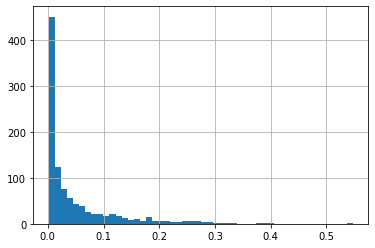

In [22]:
# The predict probability of the positive outcome only
prob_1 = model_LR.predict_proba(X_test_processed)[:, 1]
pd.Series(prob_1).hist(bins=50)

The histogram plot shows most of the predicted probabilities is generally close to zero.  

Let's plot the precision-recall curve which focuses on the performance on the minority class only.

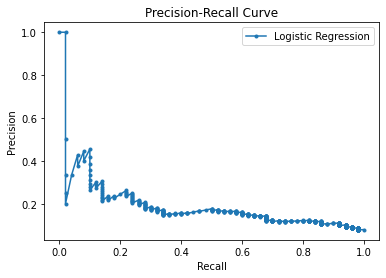

In [23]:
precision, recall, thresholds = precision_recall_curve(y_test, prob_1)
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

We will use the method called Threshold-moving to tune the threshold which used to map the probabilities to class labels to improve the performance of our classifier.  In order to find the optimal threshold that results in the best balance of precision and recall, we will need to optimize the F-score which summarizes the harmonic mean of both measures.  

F-score = (2 * Precision * Recall) / (Precision + Recall)

In [24]:
# function to find the optimal threshold having the best f1-score
def best_threshold(ytest, prob):
    # define a range of thresholds
    thresholds = np.arange(0, 1, 0.001)
    
    # evaluate each threshold
    scores = [f1_score(ytest, np.where(prob > t, 1, 0)) for t in thresholds]
    
    # index with the best f1-score
    ix = np.argmax(scores)

    return thresholds[ix], scores[ix]

In [25]:
best_thres, best_fscore = best_threshold(y_test, prob_1)
print('Best threshold = %.3f and F-Score = %.5f' % (best_thres, best_fscore))

Best threshold = 0.112 and F-Score = 0.25907


In [26]:
# Performance of the classifier with the best threshold
predict_LR_opt_thres = np.where(prob_1 > best_thres, 1, 0)
print("Confusion matrix:\n", confusion_matrix(y_test, predict_LR_opt_thres))
print("\nClassification report:\n", classification_report(y_test, predict_LR_opt_thres))

Confusion matrix:
 [[854 118]
 [ 25  25]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       972
           1       0.17      0.50      0.26        50

    accuracy                           0.86      1022
   macro avg       0.57      0.69      0.59      1022
weighted avg       0.93      0.86      0.89      1022



In [27]:
# store model performance
performance = {'Model': [],
               'Best f1-score': [],
               'Optimal Threshold': []}

performance['Model'].append('Logistic Regression')
performance['Best f1-score'].append(best_fscore)
performance['Optimal Threshold'].append(best_thres)

#### Build baseline KNN, Decision Tree, Random Forest and Gradient Boost baseline models

In [28]:
# Build baseline models
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier()
model_GB = GradientBoostingClassifier()

models = [['K-Neighbors', model_KNN],
          ['Decision Tree',  model_DT],
          ['Random Forest', model_RF],
          ['Gradient Boosting', model_GB]]

for model_name, model in models:
    model.fit(X_train_encoded, y_train)
    prediction = model.predict(X_test_encoded)
    
    prob_1 = model.predict_proba(X_test_encoded)[:, 1]
    best_thres, best_fscore = best_threshold(y_test, prob_1)
    
    predict_opt_thres = np.where(prob_1 > best_thres, 1, 0)
    print("----------" + model_name + "----------\n")
    print("Confusion matrix:\n", confusion_matrix(y_test, predict_opt_thres))
    print("\nClassification report:\n", classification_report(y_test, predict_opt_thres))

    performance['Model'].append(model_name)
    performance['Best f1-score'].append(best_fscore)
    performance['Optimal Threshold'].append(best_thres)

----------K-Neighbors----------

Confusion matrix:
 [[803 169]
 [ 24  26]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.13      0.52      0.21        50

    accuracy                           0.81      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.93      0.81      0.86      1022

----------Decision Tree----------

Confusion matrix:
 [[919  53]
 [ 41   9]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.15      0.18      0.16        50

    accuracy                           0.91      1022
   macro avg       0.55      0.56      0.56      1022
weighted avg       0.92      0.91      0.91      1022

----------Random Forest----------

Confusion matrix:
 [[841 131]
 [ 30  20]]

Classification report:
               precision    recall  f1-scor

In [29]:
print(pd.DataFrame(performance))

                 Model  Best f1-score  Optimal Threshold
0  Logistic Regression       0.259067              0.112
1          K-Neighbors       0.212245              0.000
2        Decision Tree       0.160714              0.000
3        Random Forest       0.199005              0.110
4    Gradient Boosting       0.254717              0.091


#### Build XGBoost model

According to the results of the baseline models, Logistic Regression model has the best f1-score.  We will use XGBoost to build an ensemble model to see if we can get a better result.

In [30]:
# Build baseline XGBoost model
model_XGB = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', seed=123)
model_XGB.fit(X_train_processed, y_train)
predict_XGB = model_XGB.predict(X_test_processed)
print("Confusion matrix:\n", confusion_matrix(y_test, predict_XGB))
print("\nClassification report:\n", classification_report(y_test, predict_XGB))

Confusion matrix:
 [[955  17]
 [ 46   4]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.19      0.08      0.11        50

    accuracy                           0.94      1022
   macro avg       0.57      0.53      0.54      1022
weighted avg       0.92      0.94      0.93      1022



C:\Users\c_lin\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


We will also need to move the threshold in order to get a better recall rate.  The *scale_pos_weight* parameter in XGBoost is for tuning the threshold.  A typical value for the weight is the ratio of the negative class to positive class.

In [31]:
class_count = y_train.value_counts()
weight = class_count[0] / class_count[1]
weight

19.537688442211056

In [32]:
model_XGB = XGBClassifier(objective='binary:logistic', use_label_encoder=False, 
                          scale_pos_weight=20, eval_metric='logloss', seed=123)
model_XGB.fit(X_train_processed, y_train)
predict_XGB = model_XGB.predict(X_test_processed)
print("---------- Positive weight = 20 ----------\n")
print("Confusion matrix:\n", confusion_matrix(y_test, predict_XGB))
print("\nClassification report:\n", classification_report(y_test, predict_XGB))

---------- Positive weight = 20 ----------

Confusion matrix:
 [[936  36]
 [ 40  10]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.22      0.20      0.21        50

    accuracy                           0.93      1022
   macro avg       0.59      0.58      0.58      1022
weighted avg       0.92      0.93      0.92      1022



In [33]:
performance['Model'].append('XGBoost')
performance['Best f1-score'].append(f1_score(y_test, predict_XGB))
performance['Optimal Threshold'].append(1/20)

In [34]:
print(pd.DataFrame(performance))

                 Model  Best f1-score  Optimal Threshold
0  Logistic Regression       0.259067              0.112
1          K-Neighbors       0.212245              0.000
2        Decision Tree       0.160714              0.000
3        Random Forest       0.199005              0.110
4    Gradient Boosting       0.254717              0.091
5              XGBoost       0.208333              0.050


### Hyperparameters Tuning

#### Logistic Regression model tuning

In [35]:
# Tuning hyperparameters
param_grid_lr = {'C': loguniform(1e-5, 100), 'penalty': ['l2']}

model_LR_cv = RandomizedSearchCV(model_LR, param_grid_lr, cv=5)
model_LR_cv.fit(X_train_processed, y_train)
print("Tuned Logistic Regression Parameter: {}".format(model_LR_cv.best_params_))

Tuned Logistic Regression Parameter: {'C': 0.00046374892594769, 'penalty': 'l2'}


In [36]:
model_LR_tuned = LogisticRegression(C=model_LR_cv.best_params_['C'])
model_LR_tuned.fit(X_train_processed, y_train)
predict_LR_tuned = model_LR_tuned.predict(X_test_processed)
prob_1 = model_LR_tuned.predict_proba(X_test_processed)[:, 1]
best_thres, best_fscore = best_threshold(y_test, prob_1)
print(best_thres, best_fscore)

0.052000000000000005 0.19913419913419916


In [37]:
performance['Model'].append('Tuned Logistic Regression')
performance['Best f1-score'].append(best_fscore)
performance['Optimal Threshold'].append(best_thres)

#### Random Forest model tuning

In [38]:
# Tuning hyperparameters
param_grid_rf = {'n_estimators': [200, 400, 600, 800, 1000, 1200],
                 'max_depth': [20, 40, 60, 80, 100],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2, 4, 8]
}

model_RF_cv = RandomizedSearchCV(model_RF, param_grid_rf, cv=5)
model_RF_cv.fit(X_train_encoded, y_train)

print("Tuned Random Forest Parameter: {}".format(model_RF_cv.best_params_))

Tuned Random Forest Parameter: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 60}


In [39]:
model_RF_tuned = RandomForestClassifier(n_estimators= model_RF_cv.best_params_['n_estimators'], 
                                        max_depth = model_RF_cv.best_params_['max_depth'],
                                        min_samples_split = model_RF_cv.best_params_['min_samples_split'],
                                        min_samples_leaf = model_RF_cv.best_params_['min_samples_leaf'])
model_RF_tuned.fit(X_train_encoded, y_train)
predict_RF_tuned = model_RF_tuned.predict(X_test_encoded)
prob_1 = model_RF_tuned.predict_proba(X_test_encoded)[:, 1]
best_thres, best_fscore = best_threshold(y_test, prob_1)
print(best_thres, best_fscore)

0.136 0.2709677419354839


In [40]:
performance['Model'].append('Tuned Random Forest')
performance['Best f1-score'].append(best_fscore)
performance['Optimal Threshold'].append(best_thres)

#### Gradient Boosting model tuning

In [41]:
# Tuning hyperparameters
param_grid_gb = {'n_estimators': [400, 800, 1200, 1600],
                 'max_depth': [20, 30, 40, 50, 60, 70, 80],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2, 4]
}

model_GB_cv = RandomizedSearchCV(model_GB, param_grid_gb, cv=5)
model_GB_cv.fit(X_train_encoded, y_train)

print("Tuned Random Forest Parameter: {}".format(model_GB_cv.best_params_))

Tuned Random Forest Parameter: {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 60}


In [50]:
model_GB_tuned = GradientBoostingClassifier(n_estimators= model_GB_cv.best_params_['n_estimators'], 
                                            max_depth = model_GB_cv.best_params_['max_depth'],
                                            min_samples_split = model_GB_cv.best_params_['min_samples_split'],
                                            min_samples_leaf = model_GB_cv.best_params_['min_samples_leaf'])
model_GB_tuned.fit(X_train_encoded, y_train)
predict_GB_tuned = model_GB_tuned.predict(X_test_encoded)
prob_1 = model_GB_tuned.predict_proba(X_test_encoded)[:, 1]
best_thres, best_fscore = best_threshold(y_test, prob_1)
print(best_thres, best_fscore)

0.0 0.09328358208955224


In [51]:
performance['Model'].append('Tuned Gradient Boosting')
performance['Best f1-score'].append(best_fscore)
performance['Optimal Threshold'].append(best_thres)

In [52]:
print(pd.DataFrame(performance))

                       Model  Best f1-score  Optimal Threshold
0        Logistic Regression       0.259067              0.112
1                K-Neighbors       0.212245              0.000
2              Decision Tree       0.160714              0.000
3              Random Forest       0.199005              0.110
4          Gradient Boosting       0.254717              0.091
5                    XGBoost       0.208333              0.050
6  Tuned Logistic Regression       0.199134              0.052
7        Tuned Random Forest       0.270968              0.136
8    Tuned Gradient Boosting       0.093284              0.000


### Feature Importance

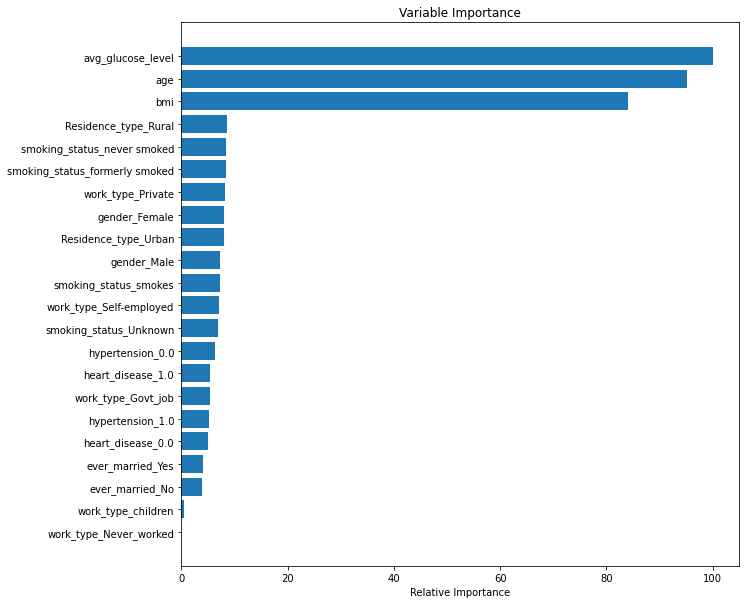

In [54]:
feature_importance = model_RF.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_encoded.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()